# 웹 스크래핑
네이버 날씨 정보 스크래핑 하기 (25점)
- 다음 URL을 이용하여 네이버 날씨 정보를 스크래핑 한 후 제시된 UI 형태의 어플리케이션을 작성하시오.
- URL : https://search.naver.com/search.naver?query=날씨
- 어플리케이션은 텍스트 기반의 메뉴로 구성되어 있으며 종료 메뉴를 선택하기 전까지 반복 수행된다.
- 접속 시간은 datetime 패키지를 이용한다.

In [168]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import requests 
from bs4 import BeautifulSoup
import time
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options = webdriver.ChromeOptions())
# driver.get('https://www.google.com')
URL = "https://search.naver.com/search.naver?query=날씨"
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
res = requests.get(URL,headers = header)
soup = BeautifulSoup(res.text, 'html.parser')
ts = time.localtime()
now = f'{ts.tm_year}.{ts.tm_mon}.{ts.tm_mday}.{ts.tm_hour}.{ts.tm_min}.{ts.tm_sec}'
address = soup.find('h2',attrs ={'class':'title'})
weather = soup.find('span',attrs ={'class':'weather before_slash'})
temperature = soup.find('div',attrs ={'class':'temperature_text'})
dust = soup.find_all('span',attrs ={'class':'txt'})

while True:
    print('========================')
    print('날씩 확인 프로그램')
    print('========================')
    print('접속 시가:', now)
    print('접속 위치:', address.text)
    print('------------------------')
    print("""1. 현재 날씨 및 온도 확인
2. 최저/최고 온도 확인
3. 미세먼지 확인
0. 종료
------------------------------""")
    print("번호를 입력하세요.")
    b =input("입력")
    if b == "1" :
        print("========================")
        print("현재 날씨 확인")
        print("========================")
        print(weather.text,"/",temperature.text)
    if b == "2" :
        print("========================")
        print("최저/최고 기온 확인")
        print("========================")
        print("")
    if b == "3" :
        print("========================")
        print("미세먼지 확인")
        print("========================")
        print(dust[1].text)
    if b == "0" :
        break
    else :
        continue


좋음
날씩 확인 프로그램
접속 시가: 2023.5.17.11.56.45
접속 위치: 광산구 우산동
------------------------
1. 현재 날씨 및 온도 확인
2. 최저/최고 온도 확인
3. 미세먼지 확인
0. 종료
------------------------------
번호를 입력하세요.
날씩 확인 프로그램
접속 시가: 2023.5.17.11.56.45
접속 위치: 광산구 우산동
------------------------
1. 현재 날씨 및 온도 확인
2. 최저/최고 온도 확인
3. 미세먼지 확인
0. 종료
------------------------------
번호를 입력하세요.


# yes24 사이트에서 파이썬 도서 검색하기
- yes24 사이트에서 파이썬 도서 검색 후 평점 9.6 이상인 도서 제목과 가격, 평점 가져오기
- 사이트 접속 및 ‘파이썬’도서 검색은 Selenium을 이용한다.
- 검색 결과 페이지에서 평점 9.6 이상의 도서 정보 추출은 BeautifulSoup을 이용한다.

In [128]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

import requests 
from bs4 import BeautifulSoup

# 웹드라이버 동적 다운로드 방식으로 실행
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()),options = webdriver.ChromeOptions())
driver.get("http://www.yes24.com/main/default.aspx")
params = {'q':'python'}

header = {'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}


response = requests.get("http://www.yes24.com/main/default.aspx", params=params)#, headers=header)
response.raise_for_status() # 응답코드가 200이 아니면 오류를 내고 멈춤

print('상태코드:', response.status_code)

element = driver.find_element(by=By.CLASS_NAME, value = 'iptTxt')
element.send_keys('파이썬')
element.submit()
element = driver.find_element(By.CSS_SELECTOR,'#goodsListWrap > div.sGoodsSecArea > div > span.baseFilter > a:nth-child(6)')
# element = driver.find_element(by=By.CLASS_NAME, value = 'sort_gb ')
element.click()

soup = BeautifulSoup(response.text, 'html.parser')


#rating_list = soup.find_all('em',attrs ={'class':'yes_b'})
rating_list = soup.find_all('span',attrs ={'class':'rating_grade'})
for rating in rating_list:
    book_rating = rating.find('em').text
    print(book_rating)

상태코드: 200


# 멜론 사이트 최신곡 검색
- 다음 URL을 이용하여 멜론 사이트에서 국내 최신곡 10위까지의 정보(노래제목, 가수, 앨범)를 판다스의 데이터프레임으로 출력하시오.
- URL : https://www.melon.com/new/index.htm

In [95]:
import numpy as np
import pandas as pd

URL = "https://www.melon.com/new/index.htm"
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
res = requests.get(URL,headers = header)
soup = BeautifulSoup(res.text, 'html.parser')

songs_list = soup.find_all('div',attrs ={'class':'ellipsis rank01'} )
writer_list = soup.find_all('div',attrs ={'class':'ellipsis rank02'} )
album_list = soup.find_all('div',attrs ={'class':'ellipsis rank03'} )
song_title=[]
writer=[]
album=[]
for songs in songs_list[:10]:
    songs_title = songs.find('a').text
    song_title.append(songs_title)
for writers in writer_list[:10]:
    writers_list = writers.find('a').text
    writer.append(writers_list)
for albums in album_list[:10]:
    albums_list = albums.find('a').text
    album.append(albums_list)
print(song_title)
print(writer)
print(album)

df = pd.DataFrame({'곡목':song_title,'가수':writer,'앨범':album})
df

['Crazy Like That', '우리 사랑 이대로 (여름날 우리 X 규현 (KYUHYUN), 정은지)', '그대가 나에게 그러하듯', 'COCO CHERRY CAKE', 'I wanna be free', 'Serenade', 'Salad Days', '밤하늘', 'Upside Down', 'Blessin']
['VERIVERY', '규현 (KYUHYUN)', '하현상', '퀸 와사비 (Queen WA$ABII)', '레인보우 노트 (Rainbow note)', '트웰브 (twlv)', '이소 (iiso)', 'XODIAC', '9001 (Ninety O One)', 'NSW yoon']
['Liminality - EP.DREAM', '우리 사랑 이대로 (여름날 우리 X 규현 (KYUHYUN), 정은지)', '어쩌다 마주친, 그대 OST Part. 3', 'COCO CHERRY CAKE', 'I wanna be free', 'Serenade', 'Salad Days', '밤하늘', 'Upside Down', 'Blessin']


,곡목,가수,앨범
0,Crazy Like That,VERIVERY,Liminality - EP.DREAM
1,"우리 사랑 이대로 (여름날 우리 X 규현 (KYUHYUN), 정은지)",규현 (KYUHYUN),"우리 사랑 이대로 (여름날 우리 X 규현 (KYUHYUN), 정은지)"
2,그대가 나에게 그러하듯,하현상,"어쩌다 마주친, 그대 OST Part. 3"
3,COCO CHERRY CAKE,퀸 와사비 (Queen WA$ABII),COCO CHERRY CAKE
4,I wanna be free,레인보우 노트 (Rainbow note),I wanna be free
5,Serenade,트웰브 (twlv),Serenade
6,Salad Days,이소 (iiso),Salad Days
7,밤하늘,XODIAC,밤하늘
8,Upside Down,9001 (Ninety O One),Upside Down
9,Blessin,NSW yoon,Blessin


# 히스토그램 그리기

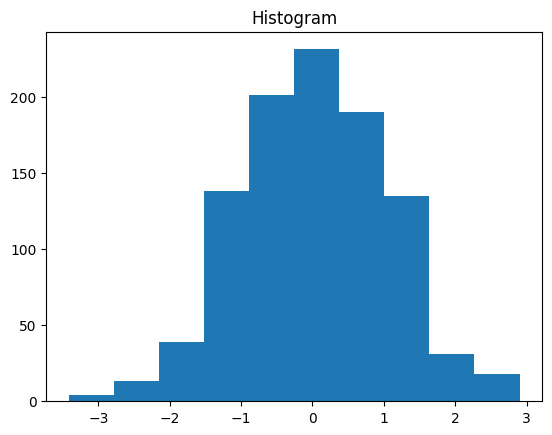

In [6]:
import numpy as np
import matplotlib.pyplot as plt
y = np.random.randn(1000) #평균이 0, ㅍ준편차가 1인 표준 정규분포로부터 난수 1000개 생성

x = np.arange(len(y))


plt.hist(y,bins = 10) # 표현할 데이터를 10개의 구간으로 나눈다.
plt.title('Histogram')
plt.show()



# 꺽은선 그래프 그리기

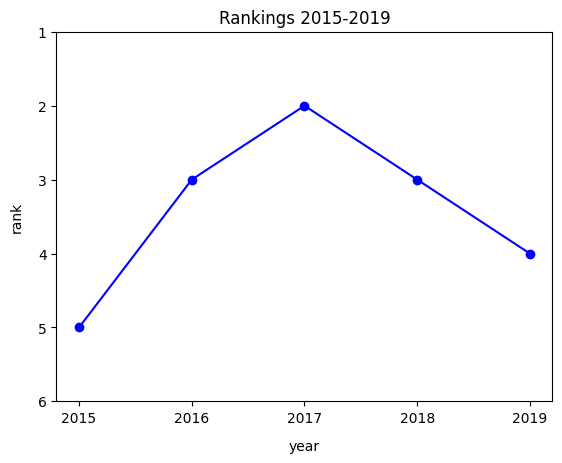

In [17]:
import numpy as np

plt.plot(['2015','2016','2017','2018','2019'],[5,3,2,3,4],'bo-')
plt.title('Rankings 2015-2019')
plt.xlabel('year',labelpad=10)
plt.ylabel('rank',labelpad=10)
plt.ylim(6,1)
plt.show()

# 산점도 그리기

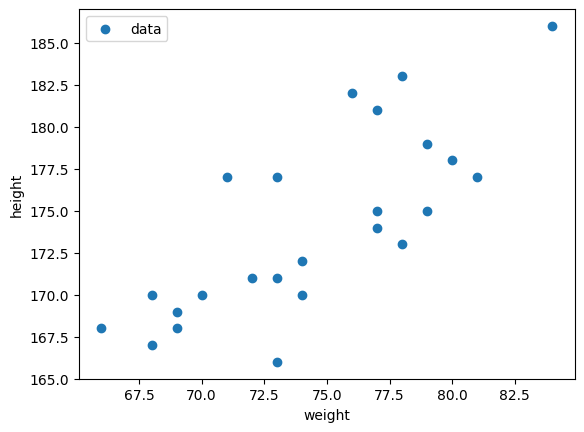

In [29]:
height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]
plt.scatter(weight, height, label='data')
plt.xlabel('weight')
plt.ylabel('height')
plt.legend()
plt.show()